## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_car = pd.read_csv('automobile_dataset_preprocessing.csv')
pd.set_option('display.max_columns', None)
df_car.head(10)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,price-binned
0,3,2,164.0,audi,gas,std,4,sedan,Front Wheel Drive,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.800625,7.840500,13950.000000,Low
1,4,2,164.0,audi,gas,std,4,sedan,Four Wheel Drive,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.067500,10.691591,17450.000000,Low
2,5,2,161.0,audi,gas,std,2,sedan,Front Wheel Drive,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.379737,9.408600,15250.000000,Low
3,6,1,158.0,audi,gas,std,4,sedan,Front Wheel Drive,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.379737,9.408600,17710.000000,Low
4,7,1,161.0,audi,gas,std,4,wagon,Front Wheel Drive,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.379737,9.408600,18920.000000,Medium
5,8,1,158.0,audi,gas,turbo,4,sedan,Front Wheel Drive,front,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,3.40,8.3,140.0,5500.0,13.836176,11.760750,23875.000000,Medium
6,9,0,161.0,audi,gas,turbo,2,hatchback,Four Wheel Drive,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,14.700938,10.691591,17859.166667,Low
7,10,2,192.0,bmw,gas,std,2,sedan,Rear Wheel Drive,front,101.2,176.8,64.8,54.3,2395,ohc,4,108,mpfi,3.50,2.80,8.8,101.0,5800.0,10.226739,8.110862,16430.000000,Low
8,11,0,192.0,bmw,gas,std,4,sedan,Rear Wheel Drive,front,101.2,176.8,64.8,54.3,2395,ohc,4,108,mpfi,3.50,2.80,8.8,101.0,5800.0,10.226739,8.110862,16925.000000,Low
9,12,0,188.0,bmw,gas,std,2,sedan,Rear Wheel Drive,front,101.2,176.8,64.8,54.3,2710,ohc,6,164,mpfi,3.31,3.19,9.0,121.0,4250.0,11.200714,8.400536,20970.000000,Medium


In [3]:
df_car = df_car.drop('Unnamed: 0', axis=1)
df_car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,price-binned
0,2,164.0,audi,gas,std,4,sedan,Front Wheel Drive,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.4,10.0,102.0,5500.0,9.800625,7.840500,13950.0,Low
1,2,164.0,audi,gas,std,4,sedan,Four Wheel Drive,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.4,8.0,115.0,5500.0,13.067500,10.691591,17450.0,Low
2,2,161.0,audi,gas,std,2,sedan,Front Wheel Drive,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.4,8.5,110.0,5500.0,12.379737,9.408600,15250.0,Low
3,1,158.0,audi,gas,std,4,sedan,Front Wheel Drive,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.4,8.5,110.0,5500.0,12.379737,9.408600,17710.0,Low
4,1,161.0,audi,gas,std,4,wagon,Front Wheel Drive,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.4,8.5,110.0,5500.0,12.379737,9.408600,18920.0,Medium


## Create new column risky_or_safe
New column risky_or_safe is created based on values of symboling column. -3 to 0 denotes a safe car, 1 to 3 denotes a risky car.

In [4]:
# the function to determine risky or safe based on values of symboling column
def risky_or_safe(sym):
    if (sym > 0):
        return 'Risky'
    return 'Safe'

In [5]:
# create new column risky_or_safe
df_car['risky_or_safe'] = df_car['symboling'].apply(lambda x: risky_or_safe(x))
df_car.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,price-binned,risky_or_safe
79,1,103.00,nissan,gas,std,4,wagon,Front Wheel Drive,front,94.5,170.2,63.8,53.5,2024,ohc,4,97,2bbl,3.15,3.29,9.4,69.0,5200.0,7.587581,6.357162,7349.0,Low,Risky
141,0,91.00,toyota,gas,std,4,hatchback,Front Wheel Drive,front,95.7,166.3,64.4,52.8,2109,ohc,4,98,2bbl,3.19,3.03,9.0,70.0,4800.0,7.840500,6.357162,7198.0,Low,Safe
65,1,161.00,mitsubishi,gas,turbo,2,hatchback,Front Wheel Drive,front,93.0,157.3,63.8,50.8,2145,ohc,4,98,spdi,3.03,3.39,7.6,102.0,5500.0,9.800625,7.840500,7689.0,Low,Risky
173,3,121.25,volkswagen,gas,std,2,convertible,Front Wheel Drive,front,94.5,159.3,64.2,55.6,2254,ohc,4,109,mpfi,3.19,3.40,8.5,90.0,5500.0,9.800625,8.110862,11595.0,Low,Risky
80,1,128.00,nissan,gas,std,2,sedan,Front Wheel Drive,front,94.5,165.3,63.8,54.5,1951,ohc,4,97,2bbl,3.15,3.29,9.4,69.0,5200.0,7.587581,6.357162,7299.0,Low,Risky


## Common Plotting Parameters

In [6]:
plot_color = '#5600ff' #'#4a91f2'
palette = ['#a1c9d0', '#6eacb7', '#e2b7b9', '#fdcece', '#cc8084']

plt.subplots_adjust(
    left    =  0.1, 
    bottom  =  0.4, 
    right   =  0.2, 
    top     =  0.5, 
    wspace  =  0.2, 
    hspace  =  0.2
)
sns.set_style("whitegrid") #set seaborn style template

<Figure size 432x288 with 0 Axes>

## Count the number of cars based on each body style and risk category

In [7]:
riskCount = df_car.groupby(['body-style', 'risky_or_safe'])['symboling'].count().reset_index()
riskCount.columns=['Body Style','Risk Category','Value']
riskCount

,Body Style,Risk Category,Value
0,convertible,Risky,4
1,hardtop,Risky,7
2,hardtop,Safe,1
3,hatchback,Risky,52
4,hatchback,Safe,10
5,sedan,Risky,35
6,sedan,Safe,56
7,wagon,Risky,3
8,wagon,Safe,21


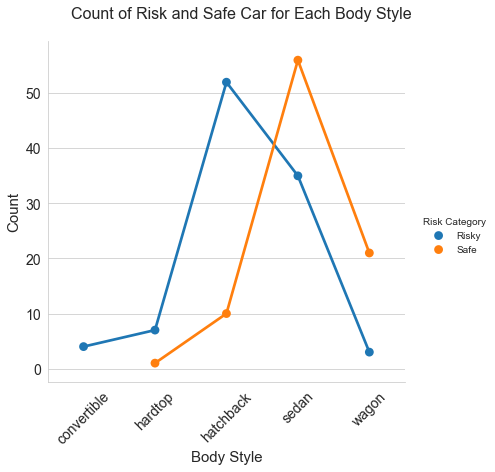

In [8]:
risk1 = sns.catplot(data=riskCount, x='Body Style', y='Value', hue='Risk Category', kind='point', height=5)

risk1.fig.suptitle('Count of Risk and Safe Car for Each Body Style', fontsize=16)
risk1.fig.subplots_adjust(top=0.9)
risk1.fig.set_size_inches(7,6)

risk1.set_xlabels('Body Style', fontsize=15)
risk1.set_ylabels('Count', fontsize=15)
risk1.set_xticklabels(fontsize=14, rotation=45)
risk1.set_yticklabels(fontsize=14)

risk1.fig.savefig('risk_bodystyle.jpg', dpi=risk1.fig.dpi, bbox_inches='tight')

## The number of car based on price category and risk category

In [9]:
riskCount2 = df_car.groupby(['price-binned', 'risky_or_safe'])['symboling'].count().reset_index()
riskCount2.columns=['Price Category','Risk Category','Value']
riskCount2

,Price Category,Risk Category,Value
0,High,Risky,5
1,High,Safe,7
2,Low,Risky,89
3,Low,Safe,69
4,Medium,Risky,7
5,Medium,Safe,12


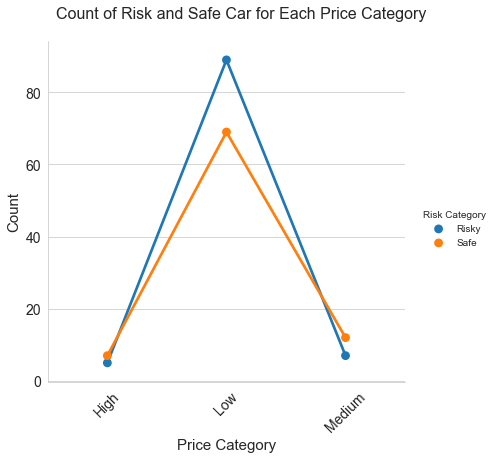

In [10]:
risk2 = sns.catplot(data=riskCount2, x='Price Category', y='Value', hue='Risk Category', kind='point', height=5)

risk2.fig.suptitle('Count of Risk and Safe Car for Each Price Category', fontsize=16)
risk2.fig.subplots_adjust(top=0.9)
risk2.fig.set_size_inches(7,6)

risk2.set_xlabels('Price Category', fontsize=15)
risk2.set_ylabels('Count', fontsize=15)
risk2.set_xticklabels(fontsize=14, rotation=45)
risk2.set_yticklabels(fontsize=14)

risk2.fig.savefig('risk_priceCategory.jpg', dpi=risk2.fig.dpi, bbox_inches='tight')

## Price average, min, and max based on risk category and body style

In [11]:
price2 = df_car.groupby(['body-style', 'risky_or_safe'])['price'].mean().reset_index()
price2.columns = ['Body Style', 'Risk Category', 'Price Average']

price2.pivot_table(index='Risk Category', columns='Body Style')

Price Average                                                   
Body Style      convertible  hardtop     hatchback         sedan         wagon
Risk Category                                                                 
Risky               25337.0  21356.0  10013.778846  10605.685714  11422.666667
Safe                    NaN  28176.0   9962.316667  17176.428571  12654.095238

In [12]:
price3 = df_car.groupby(['body-style', 'risky_or_safe'])['price'].min().reset_index()
price3.columns = ['Body Style', 'Risk Category', 'Price Min']

price3.pivot_table(index='Risk Category', columns='Body Style')

Price Min                                   
Body Style    convertible  hardtop hatchback   sedan   wagon
Risk Category                                               
Risky             11595.0   8249.0    5118.0  5499.0  7349.0
Safe                  NaN  28176.0    7198.0  6575.0  6918.0

In [13]:
price4 = df_car.groupby(['body-style', 'risky_or_safe'])['price'].max().reset_index()
price4.columns = ['Body Style', 'Risk Category', 'Price Max']

price4.pivot_table(index='Risk Category', columns='Body Style')

Price Max                                         
Body Style    convertible  hardtop     hatchback    sedan    wagon
Risk Category                                                     
Risky             37028.0  45400.0  31400.500000  24565.0  18920.0
Safe                  NaN  28176.0  17859.166667  41315.0  28248.0

## Min, max, mean, and number of car values for each risk category

In [15]:
risk_group = df_car.groupby('risky_or_safe')
risk_count = risk_group.size().reset_index()
risk_count.columns=['Risk Category','Number of Cars']

price_mean1 = df_car.groupby('risky_or_safe')['price'].mean().reset_index()
price_mean1.columns = ['Risk Category', 'Price Average']

price_min1 = df_car.groupby('risky_or_safe')['price'].min().reset_index()
price_min1.columns = ['Risk Category', 'Min Price']

price_max1 = df_car.groupby('risky_or_safe')['price'].max().reset_index()
price_max1.columns = ['Risk Category', 'Max Price']

price_join = risk_count.merge(price_mean1, how="inner", left_on="Risk Category", right_on="Risk Category", suffixes=['', '_right'])
price_join = price_join.merge(price_min1, how='inner',left_on="Risk Category", right_on="Risk Category", suffixes=['', '_right'])
price_join = price_join.merge(price_max1, how="inner", left_on="Risk Category", right_on="Risk Category", suffixes=['', '_right'])

price_join

,Risk Category,Number of Cars,Price Average,Min Price,Max Price
0,Risky,101,11653.698020,5118.0,45400.0
1,Safe,88,15402.445076,6575.0,41315.0


## Price average distribution

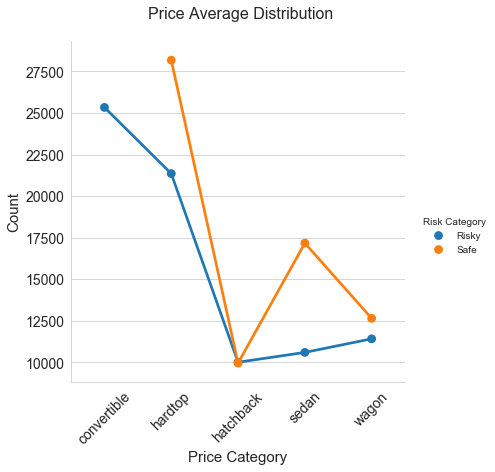

In [16]:
priceRange3 = sns.catplot(data=price2, x='Body Style', y='Price Average', hue='Risk Category', kind='point', height=5)

priceRange3.fig.suptitle('Price Average Distribution', fontsize=16)
priceRange3.fig.subplots_adjust(top=0.9)
priceRange3.fig.set_size_inches(7,6)

priceRange3.set_xlabels('Price Category', fontsize=15)
priceRange3.set_ylabels('Count', fontsize=15)
priceRange3.set_xticklabels(fontsize=14, rotation=45)
priceRange3.set_yticklabels(fontsize=14)

priceRange3.fig.savefig('price_average_bodystyle.jpg', dpi=priceRange3.fig.dpi, bbox_inches='tight')

## Feature correlation

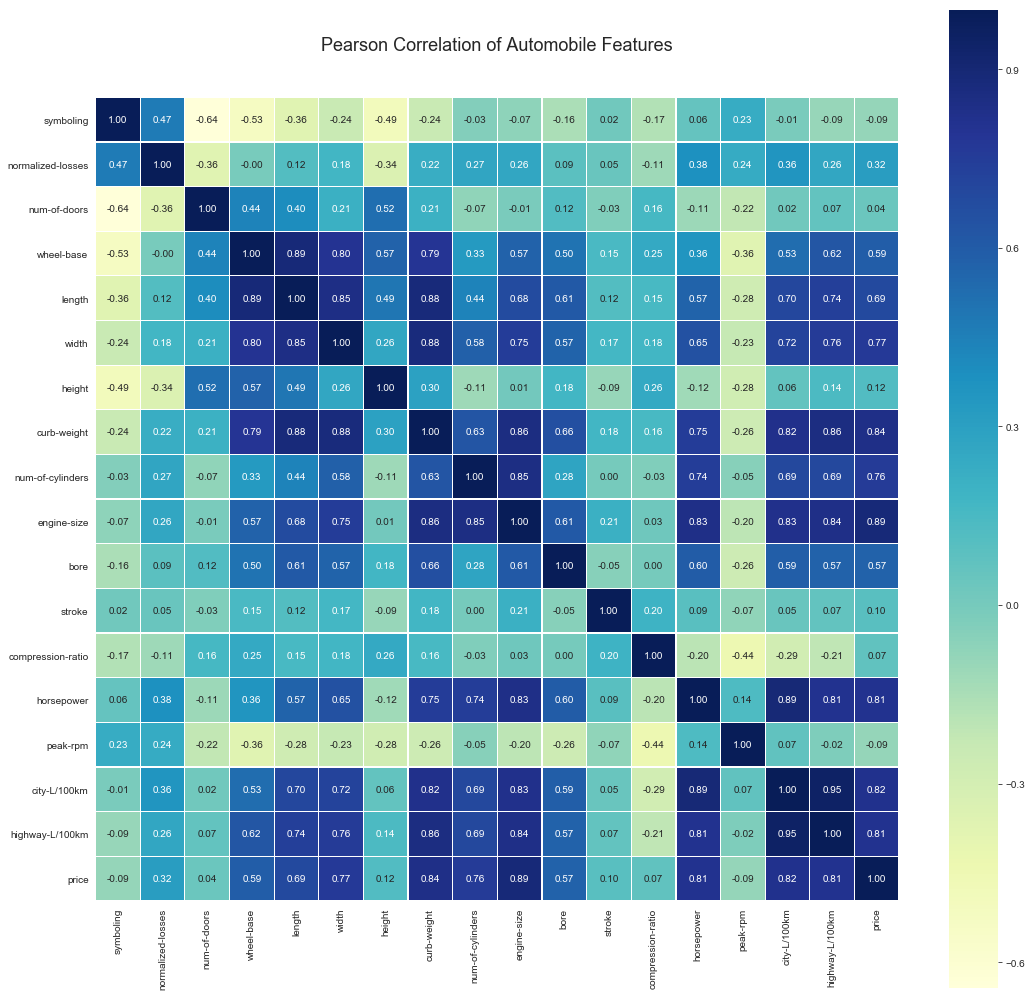

In [17]:
f, ax = plt.subplots(figsize=(18, 18))
plt.title('Pearson Correlation of Automobile Features\n\n', fontsize=18)

sns.heatmap(df_car.corr(), annot=True, fmt='.2f', linewidth=0.25, square=True, cmap='YlGnBu')

## Price correlation to engine size and horsepower

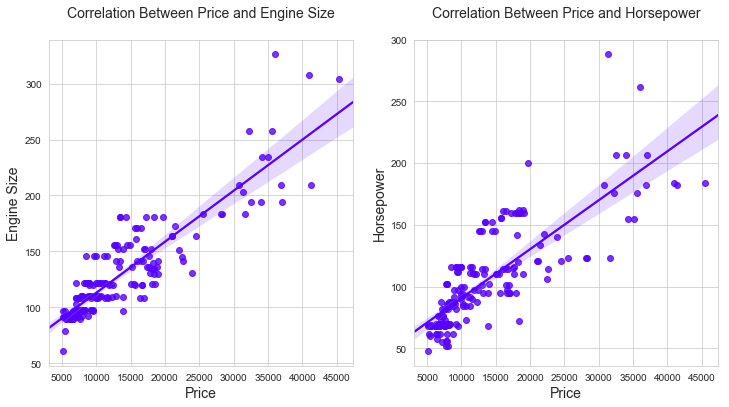

In [18]:
fig, ax = plt.subplots(figsize=(12,6), ncols=2, nrows=1) # get the figure and axes objects 

priceEngineSize =sns.regplot('price', 'engine-size', data=df_car, color=plot_color, ax=ax[0])
priceEngineSize.set_ylabel('Engine Size',fontsize=14 )
priceEngineSize.set_xlabel('Price',fontsize=14)
priceEngineSize.set_title('Correlation Between Price and Engine Size\n', fontsize=14)

priceHorsepower =sns.regplot('price', 'horsepower', data=df_car, color=plot_color, ax=ax[1])
priceHorsepower.set_ylabel('Horsepower',fontsize=14 )
priceHorsepower.set_xlabel('Price',fontsize=14)
priceHorsepower.set_title('Correlation Between Price and Horsepower\n', fontsize=14)

fig.savefig('corr_price_engine_size_horsepower.jpg',dpi=fig.dpi, bbox_inches='tight')

In [19]:
df_car[['price', 'engine-size']].corr()

,price,engine-size
price,1.000000,0.890417
engine-size,0.890417,1.000000


In [20]:
df_car[['price', 'horsepower']].corr()

,price,horsepower
price,1.0000,0.8129
horsepower,0.8129,1.0000


## Curb weight correlation to engine size

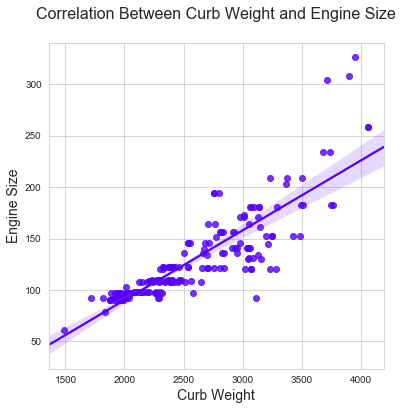

In [21]:
fig, ax = plt.subplots(figsize=(6,6), ncols=1, nrows=1) # get the figure and axes objects 

ax.set_title('Correlation Between Curb Weight and Engine Size\n', fontsize=16)

weightEngineSize =sns.regplot('curb-weight', 'engine-size', data=df_car, color=plot_color)
weightEngineSize.set_ylabel('Engine Size',fontsize=14 )
weightEngineSize.set_xlabel('Curb Weight',fontsize=14)

fig.savefig('corr_curbweight_engine_size.jpg',dpi=fig.dpi, bbox_inches='tight')

In [22]:
df_car[['curb-weight', 'engine-size']].corr()

,curb-weight,engine-size
curb-weight,1.000000,0.858022
engine-size,0.858022,1.000000


## Correlation between city-L/100km and highway-L/100km

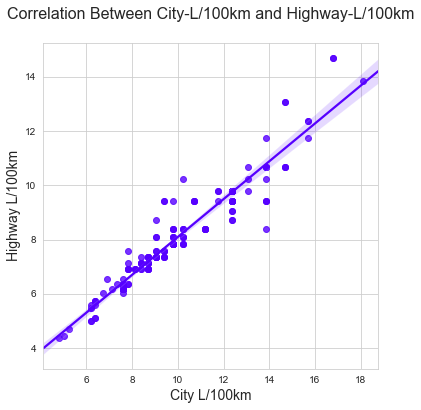

In [23]:
fig, ax = plt.subplots(figsize=(6,6), ncols=1, nrows=1) # get the figure and axes objects 

ax.set_title('Correlation Between City-L/100km and Highway-L/100km\n', fontsize=16)

cityHighway =sns.regplot('city-L/100km', 'highway-L/100km', data=df_car, color=plot_color)
cityHighway.set_ylabel('Highway L/100km',fontsize=14 )
cityHighway.set_xlabel('City L/100km',fontsize=14)

fig.savefig('corr_city_highway.jpg',dpi=fig.dpi, bbox_inches='tight')

In [24]:
df_car[['city-L/100km', 'highway-L/100km']].corr()

,city-L/100km,highway-L/100km
city-L/100km,1.000000,0.954906
highway-L/100km,0.954906,1.000000


## Price correlation to bore and stroke

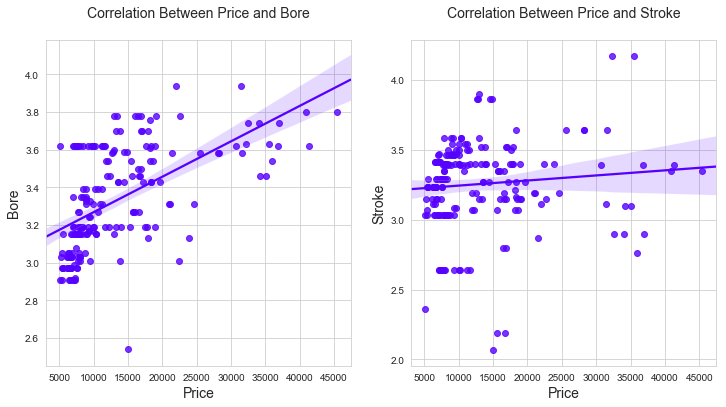

In [25]:
fig, ax = plt.subplots(figsize=(12,6), ncols=2, nrows=1) # get the figure and axes objects 

priceBore =sns.regplot('price', 'bore', data=df_car, color=plot_color, ax=ax[0])
priceBore.set_ylabel('Bore',fontsize=14 )
priceBore.set_xlabel('Price',fontsize=14)
priceBore.set_title('Correlation Between Price and Bore\n', fontsize=14)

priceStroke =sns.regplot('price', 'stroke', data=df_car, color=plot_color, ax=ax[1])
priceStroke.set_ylabel('Stroke',fontsize=14 )
priceStroke.set_xlabel('Price',fontsize=14)
priceStroke.set_title('Correlation Between Price and Stroke\n', fontsize=14)

fig.savefig('corr_price_bore_stroke.jpg',dpi=fig.dpi, bbox_inches='tight')

In [26]:
df_car[['price', 'bore']].corr()

,price,bore
price,1.00000,0.57005
bore,0.57005,1.00000


In [27]:
df_car[['price', 'stroke']].corr()

,price,stroke
price,1.000000,0.095779
stroke,0.095779,1.000000
